In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
from keras.preprocessing.image import array_to_img

In [3]:
dir = "DATASET" #file path

In [4]:
categories = ['puffy eyes' , 'wrinkles' , 'dark spots']

In [5]:
data = []

In [6]:
for category in categories:
    path = os.path.join(dir,category) #feature images path
    #print(path)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        #print(imgpath) #individual image path
        age_img = cv2.imread(imgpath,0) #reads images as arrays
        #print(type(age_img))
        try:
            age_img = cv2.resize(age_img,(50,50))
            #print(age_img) 
            image = np.array(age_img).flatten() #flatterns the 50x50 array into 1D array
            #print(image)
            data.append([image,label])
        except Exception as e: 
            pass
        

In [7]:
print(len(data))

903


In [8]:
Pickle_Dataset = open('Data.pickle','wb')
pickle.dump(data,Pickle_Dataset)
Pickle_Dataset.close()

In [9]:
Pickle_Dataset = open('Data.pickle','rb')
data = pickle.load(Pickle_Dataset)
Pickle_Dataset.close()

In [10]:
data

[[array([ 15,  43,  52, ..., 231, 229, 219], dtype=uint8), 0],
 [array([213, 205, 218, ..., 112, 147, 205], dtype=uint8), 0],
 [array([141,  68, 165, ..., 154, 149, 143], dtype=uint8), 0],
 [array([236, 236, 236, ..., 133, 180, 196], dtype=uint8), 0],
 [array([207, 209, 211, ..., 178, 194, 202], dtype=uint8), 0],
 [array([181, 188, 189, ..., 149, 144, 134], dtype=uint8), 0],
 [array([172, 172, 172, ..., 158, 158, 171], dtype=uint8), 0],
 [array([ 24,  62, 144, ..., 105, 110, 116], dtype=uint8), 0],
 [array([111, 140, 146, ..., 220, 224, 227], dtype=uint8), 0],
 [array([213, 217, 214, ..., 211, 209, 198], dtype=uint8), 0],
 [array([205, 209, 213, ..., 134, 133, 130], dtype=uint8), 0],
 [array([214, 222, 222, ..., 212, 215, 205], dtype=uint8), 0],
 [array([104, 105, 108, ..., 104,  82,  65], dtype=uint8), 0],
 [array([244, 245, 242, ..., 184, 184, 185], dtype=uint8), 0],
 [array([149, 173, 181, ..., 189, 190, 194], dtype=uint8), 0],
 [array([209, 209, 211, ..., 100,  99, 101], dtype=uint

In [75]:
random.shuffle(data)
features = []
labels = []
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.50)

In [77]:
model = SVC(C = 1, kernel = 'poly' , gamma = 'auto')
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [78]:
#pickling the model
pick_model= open('model.sav','wb')
pickle.dump(model, pick_model)
pick_model.close()

In [79]:
pick_model= open('model.sav','rb')
model = pickle.load(pick_model)
pick_model.close()

In [80]:
prediction = model.predict(x_test)
accuracy = model.score (x_test,y_test)
categories = ['Puffy eyes' , 'Wrinkles on face' , 'Dark spots on face']
print('Accuracy is :' ,accuracy)
print('Prediction is: ', categories[prediction[1]])

Accuracy is : 0.661504424778761
Prediction is:  Dark spots on face


In [81]:
#IMAGE = x_test[1].reshape(50,50)
#img_pil_from_numpy_array = array_to_img(IMAGE)
#cv2.imshow('image',img_pil_from_numpy_array)

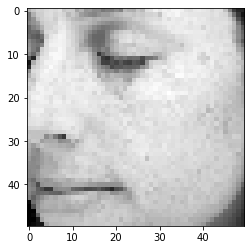

In [82]:
IMAGE = x_test[1].reshape(50,50)
plt.imshow(IMAGE, cmap = 'gray')
plt.show()